In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
X=dataset.iloc[:,[3,4]].values

In [23]:

"""# The following bandwidth can be automatically detected using
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)"""

# MeanShift clustering
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=min(len(X), 500)) # Ensure n_samples does not exceed X's size

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels_ms = ms.labels_  # Use a different variable name to avoid conflict
cluster_centers_ms = ms.cluster_centers_ # Use a different variable name

labels_unique_ms = np.unique(labels_ms)
n_clusters_ms = len(labels_unique_ms)

print("number of estimated clusters (MeanShift): %d" % n_clusters_ms)

number of estimated clusters (MeanShift): 3


In [24]:
# Affinity Propagation clustering
af = AffinityPropagation(random_state=0)
y_af = af.fit_predict(X)

# Prepare DataFrame for saving and plotting
supervised = dataset.copy() # Make a copy to avoid modifying original dataset DataFrame directly
supervised['Cluster_group'] = y_af
supervised.to_csv("cluster.csv", index=False)
print("Cluster labels assigned and saved to cluster.csv")

Cluster labels assigned and saved to cluster.csv


In [25]:
# Print exemplars from Affinity Propagation
# exemplars was not defined in the original script, it needs to be calculated from af object
exemplar_indices = af.cluster_centers_indices_
exemplars = X[exemplar_indices]
print("\nExemplar data points (Affinity Propagation):")
print(exemplars)


Exemplar data points (Affinity Propagation):
[[ 25   5]
 [ 28  82]
 [ 28  32]
 [ 46  51]
 [ 60  52]
 [ 67  40]
 [ 77  12]
 [ 78  90]
 [ 78  73]
 [103  85]
 [103  23]]


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


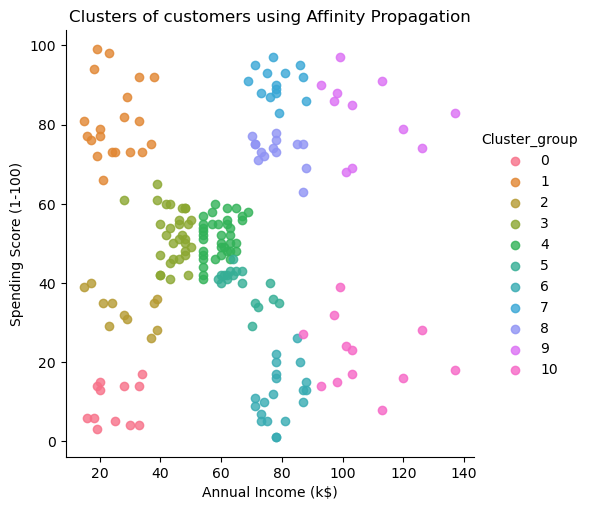

In [26]:
import seaborn as sns
# Plotting
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5],
                   fit_reg=False, legend=True, legend_out=True)
plt.title('Clusters of customers using Affinity Propagation')
plt.xlabel(supervised.columns[3])
plt.ylabel(supervised.columns[4])
plt.show()